In [1]:
#Importing Libraries
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import pandas as pd
from keras.preprocessing.image import img_to_array
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

Using TensorFlow backend.


In [4]:
def get_prediction(model_path, test_path, classes, img_size, channel):
    """
    Importing model, opening images and predicting labels
    
    Arguments:
    model_path -- path of the model we use
    test_path -- path of the test classes of images
    classes -- class names, dictionary 
    img_size -- size of the imput images
    channel -- channel of the images if rgb channel should be 3
                                     if grayscale channel should be 1 
    
    Returns:
    dataframe -- a dataframe containing images path, true labels, predicted labels
    """
    
    evaluation = []
    model = tf.keras.models.load_model(model_path)
    print("Model Loaded")
    for root, dirs, files in os.walk(test_path):
        test_path = root.split(os.sep)
        print((len(test_path) - 1) * '---', os.path.basename(root))
        cur_class = classes.get(os.path.basename(root))
        for file in files:
            data = []
            data.append(str(os.path.basename(root)) + '/' + file)
            data.append(cur_class)
            img = Image.open(root + '/' + file)
            if img.size == (img_size, img_size):
                array = img_to_array(img)
                array /= 255
                array = array.reshape(1, img_size, img_size, channel)
                pred = np.argmax(model.predict(array), axis=1)
                data.append(pred[0])
                evaluation.append(data)
    print("Walking completed")
    df = pd.DataFrame(data=evaluation,columns=['path', 'true', 'predicted'])
    return df

In [5]:
def correlation_analysis(true, predicted, labels, fig_dims):
    """
    Prints classificaion report and confusion matrix
    
    Arguments:
    true -- list of the true labels
    predicted -- list of the predicted labels
    labels -- class label names
    fig_dims -- figure size of the correlation matrix
    """
    
    print('-'*10 +"Classification Report"+'-'*10)
    print(classification_report(true,predicted, target_names =labels))
    cm = confusion_matrix(true,predicted)

    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(cm, annot=True,
            annot_kws={"size": 10},
            xticklabels=labels,
            yticklabels=labels, ax=ax)
    ax.set_title('Confusion matrix')
    plt.show()

In [6]:
def wrong_classification_examples(test_path, df_wrong_ex, classes,ex_number):
    """
    Printing randomly true and predicted classes from wrong predictions
    
    Arguments:
    test_path -- path of the test classes of images 
    df_wrong_ex -- only get wrong predictions
    classes -- name of classes
    ex_number -- number of examples
    """
    
    randomlist = random.sample(range(0, len(df_wrong_ex)), ex_number)
    next_img = 1
    fig = plt.figure(figsize=(10,10))
    for i in randomlist:
        path = str(test_path) + "/" + str(df_wrong_ex.iloc[i:i+1,0:1].values[0][0])
        img = Image.open(path)
        plt.subplot(5,2,next_img) # 5 is number of row, 2 is number of colums
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.title("True: "+ str(list(classes)[df_wrong_ex.iloc[i:i+1,1:2].values[0][0]])+ 
                  "  Predicted: " + str(list(classes)[df_wrong_ex.iloc[i:i+1,2:3].values[0][0]]))
        next_img +=1
        
    plt.show()

In [7]:
# Importing model
model_path = "C:/Users/semih/OneDrive/Masaüstü/kendimodelimiz92,89.hdf5"  
test_path = "D:/Workspace/Projects/intel_image_classification/seg_test/seg_test"
classes = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
img_size = 150
channel = 3 
fig_dims=(8,6)

In [8]:
df = get_prediction(model_path,
                        test_path,
                        classes,
                        img_size,
                        channel)

Model Loaded
 seg_test
--- buildings
--- forest
--- glacier
--- mountain
--- sea
--- street
Walking completed


----------Classification Report----------
              precision    recall  f1-score   support

   buildings       0.87      0.87      0.87       437
      forest       0.97      0.98      0.97       473
     glacier       0.89      0.80      0.84       549
    mountain       0.84      0.86      0.85       523
         sea       0.89      0.90      0.89       510
      street       0.88      0.92      0.90       501

    accuracy                           0.89      2993
   macro avg       0.89      0.89      0.89      2993
weighted avg       0.89      0.89      0.89      2993



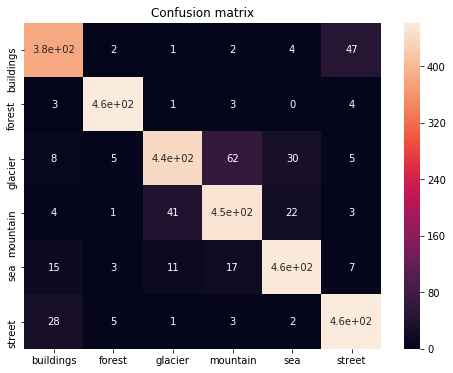

In [9]:
correlation_analysis(df.iloc[:, 1:2],
                         df.iloc[:, 2:3],
                         classes.keys(),
                         fig_dims)

### Looks like there is a problem between buildings-street, mountain-glacier classes. Lets check of the example

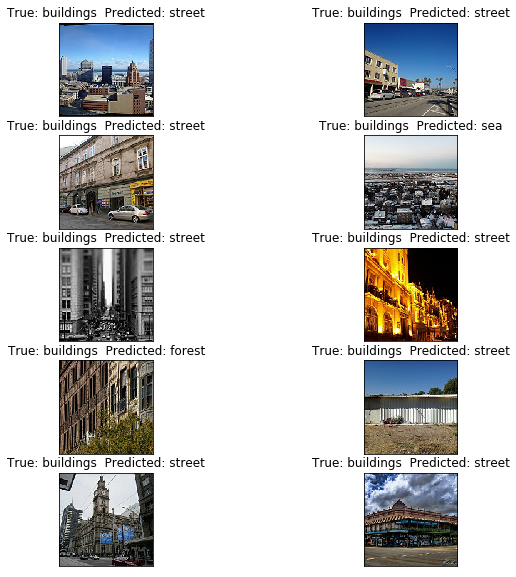

In [11]:
class_order = 0 # buildings
ex_number = 10
df_wrong_ex = df.loc[df['true']==class_order].loc[df.loc[df['true']==class_order]['predicted']!=class_order]
wrong_classification_examples(test_path,
                                  df_wrong_ex,
                                  classes,
                                  ex_number)

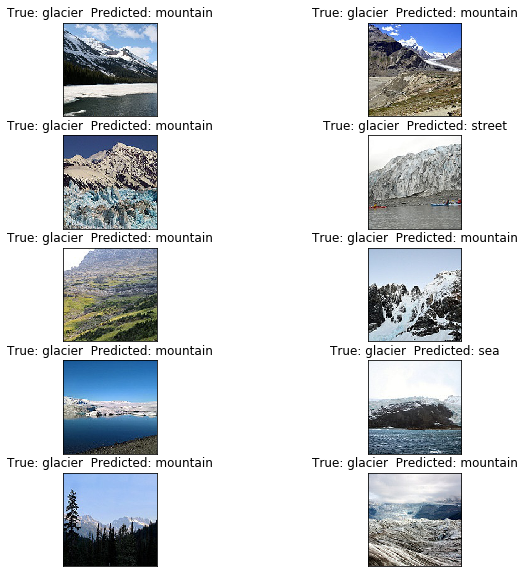

In [13]:
class_order = 2 # buildings
ex_number = 10
df_wrong_ex = df.loc[df['true']==class_order].loc[df.loc[df['true']==class_order]['predicted']!=class_order]
wrong_classification_examples(test_path,
                                  df_wrong_ex,
                                  classes,
                                  ex_number)